<a href="https://colab.research.google.com/github/dzeko5959/AI/blob/main/ML/Project/DiamondPricePrediction/ML_DiamondPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#프로젝트 주제: 다이아몬드의 특성에 따른 다이아몬드 가격 예측 모델

##1. 데이터 준비 및 분석

In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "diamonds.csv"
dataset_slug = "shivam2503/diamonds"

# Load the latest version
df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        dataset_slug,
        file_path,
    )

print("First 5 records:\n", df.head())

/tmp/ipython-input-2803708224.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'diamonds' dataset.
First 5 records:
    Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


##2. EDA
- 보고서 2쪽 [2.데이터 탐색(EDA)]와 연결됨

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

(1) 데이터 정보 확인: 행/열 개수, 컬럼 이름, 데이터 타입, 결측치 여부

In [ ]:
print("1. df.info() : 데이터 정보\n")
df.info()

1. df.info() : 데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


(2) 결측치 확인 및 처리

In [ ]:
print("2. 결측치 개수 확인\n")
print(df.isnull().sum())

2. 결측치 개수 확인

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


=> 초기 데이터셋에 결측치가 없음

In [ ]:
# 다이아몬드 데이터에서 0이거나 음수일 수 없는 수치형 컬럼
columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
print(f"검색 대상 컬럼: {columns_to_check}")
print("-" * 50)

# 개별 컬럼별로 0 또는 음수인 항목 개수 확인
print("--- 개별 컬럼별 0 또는 음수인 항목 개수 ---")

for col in columns_to_check:
    count = (df[col] <= 0).sum()
    print(f"'{col}' 컬럼에서 0 또는 음수인 항목 개수: {count}개")

print("-" * 50)

검색 대상 컬럼: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
--------------------------------------------------
--- 개별 컬럼별 0 또는 음수인 항목 개수 ---
'carat' 컬럼에서 0 또는 음수인 항목 개수: 0개
'depth' 컬럼에서 0 또는 음수인 항목 개수: 0개
'table' 컬럼에서 0 또는 음수인 항목 개수: 0개
'price' 컬럼에서 0 또는 음수인 항목 개수: 0개
'x' 컬럼에서 0 또는 음수인 항목 개수: 8개
'y' 컬럼에서 0 또는 음수인 항목 개수: 7개
'z' 컬럼에서 0 또는 음수인 항목 개수: 20개
--------------------------------------------------


In [ ]:
print("--- x, y, z 중 하나라도 0인 항목 (상위 5개) ---")

zero_mask = (df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)
outlier_rows = df[zero_mask].head()

if outlier_rows.shape[0] > 0:
    print(outlier_rows)
else:
    print("검색된 0값을 가진 행이 없습니다.")

print("-" * 50)
print(f"참고: 전체 0값을 가진 행의 개수는 {zero_mask.sum()}개 입니다.")

--- x, y, z 중 하나라도 0인 항목 (상위 5개) ---
       Unnamed: 0  carat      cut color clarity  depth  table  price     x  \
2207         2208   1.00  Premium     G     SI2   59.1   59.0   3142  6.55   
2314         2315   1.01  Premium     H      I1   58.1   59.0   3167  6.66   
4791         4792   1.10  Premium     G     SI2   63.0   59.0   3696  6.50   
5471         5472   1.01  Premium     F     SI2   59.2   58.0   3837  6.50   
10167       10168   1.50     Good     G      I1   64.0   61.0   4731  7.15   

          y    z  
2207   6.48  0.0  
2314   6.60  0.0  
4791   6.47  0.0  
5471   6.47  0.0  
10167  7.04  0.0  
--------------------------------------------------
참고: 전체 0값을 가진 행의 개수는 20개 입니다.


*   x : Length of the diamond (mm)
*   y : Width of the diamond (mm)
*   z : Height of the diamond (mm)

x, y, z는 각각 다이아몬드의 길이, 너비, 높이를 의미한다. 그런데 이 길이가 아무리 작다고 하더라도 0 또는 음수가 나올 수는 없다. 그렇기 때문에 0 또는 음수가 나온 값들은 제거하고자 한다.

In [ ]:
# 데이터 처리

columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
print(f"이상치 제거 시작. 원본 행 개수: {len(df)}개")

final_mask = True
for col in columns_to_check:
    final_mask = final_mask & (df[col] > 0)

df_cleaned = df[final_mask].copy()
rows_removed = len(df) - len(df_cleaned)
df_original = df  # 원래 df를 df_original에 저장
df = df_cleaned # 0 또는 음수 값을 제거한 df_cleaned를 df에 저장

print("-" * 50)
print(f"제거된 이상치 행 개수: {rows_removed}개")
print(f"클리닝 후 저장된 최종 행 개수 (df_cleaned): {len(df_cleaned)}개")
print("-" * 50)

print("\n[검증] 'df_cleaned'의 수치형 변수 최소값:")
print(df_cleaned[columns_to_check].describe().loc['min'])

이상치 제거 시작. 원본 행 개수: 53940개
--------------------------------------------------
제거된 이상치 행 개수: 20개
클리닝 후 저장된 최종 행 개수 (df_cleaned): 53920개
--------------------------------------------------

[검증] 'df_cleaned'의 수치형 변수 최소값:
carat      0.20
depth     43.00
table     43.00
price    326.00
x          3.73
y          3.68
z          1.07
Name: min, dtype: float64


(3) 기술 통계 확인 (수치형 변수 요약)

In [ ]:
print("3. df.describe(): 수치형 변수 요약 통계\n")
print(df.describe())

3. df.describe(): 수치형 변수 요약 통계

         Unnamed: 0         carat         depth         table         price  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean   26972.355731      0.797698     61.749514     57.456834   3930.993231   
std    15571.269010      0.473795      1.432331      2.234064   3987.280446   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13487.750000      0.400000     61.000000     56.000000    949.000000   
50%    26973.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40457.250000      1.040000     62.500000     59.000000   5323.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53920.000000  53920.000000  53920.000000  
mean       5.731627      5.734887      3.540046  
std        1.119423      1.140126      0.702530  
min        3.730000      3.680000      1.070000  
25%   

(4) 범주형 변수 요약 통계

In [ ]:
print("4. 범주형 변수 (Cut, Color, Clarity) 빈도 확인\n")
for col in ['cut', 'color', 'clarity']:
  print(f"\n--- {col.upper()} ---")
  print(df[col].value_counts())

4. 범주형 변수 (Cut, Color, Clarity) 빈도 확인


--- CUT ---
cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

--- COLOR ---
color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

--- CLARITY ---
clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64


(5) 범주형 데이터 Categorical 타입으로 변환 및 순서 지정

순서형 변수는 값이 높을수록(리스트의 오른쪽에 위치할수록) 더 좋은 품질을 의미하도록 지정
1. Cut : Fair(낮음) -> Ideal(높음)
*   Cut 항목 : 'Fair', 'Good', 'Very Good', 'Premium', 'Ideal'
2. Color : J(낮음/노란빛) -> D(높음/무색)
*   Color 항목 : 'J', 'I', 'H', 'G', 'F', 'E', 'D'
3. Clarity : 5등급 -> 1등급으로 가장 낮은 I1부터 가장 높은 IF까지 나열
*   5등급: I1, I2, I3
*   4등급: SI2, SI1
*   3등급: VS2, VS1
*   2등급: VVS2, VVS1
*   1등급: IF, FL

In [ ]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

df['cut'] = pd.Categorical(
    df['cut'],
    categories=cut_order,
    ordered=True
)

df['color'] = pd.Categorical(
    df['color'],
    categories=color_order,
    ordered=True
)

df['clarity'] = pd.Categorical(
    df['clarity'],
    categories=clarity_order,
    ordered=True
)

print("\n 범주형 변수의 순서 지정 및 타입 변환 완료.")
print("-" * 50)
print("새로운 데이터프레임 정보:")
df.info()


 범주형 변수의 순서 지정 및 타입 변환 완료.
--------------------------------------------------
새로운 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  53920 non-null  int64   
 1   carat       53920 non-null  float64 
 2   cut         53920 non-null  category
 3   color       53920 non-null  category
 4   clarity     53920 non-null  category
 5   depth       53920 non-null  float64 
 6   table       53920 non-null  float64 
 7   price       53920 non-null  int64   
 8   x           53920 non-null  float64 
 9   y           53920 non-null  float64 
 10  z           53920 non-null  float64 
dtypes: category(3), float64(6), int64(2)
memory usage: 3.9 MB


(6) 탐색적 데이터 시각화

--- 1. 전체 수치형 변수 분포 확인 (Histogram) ---


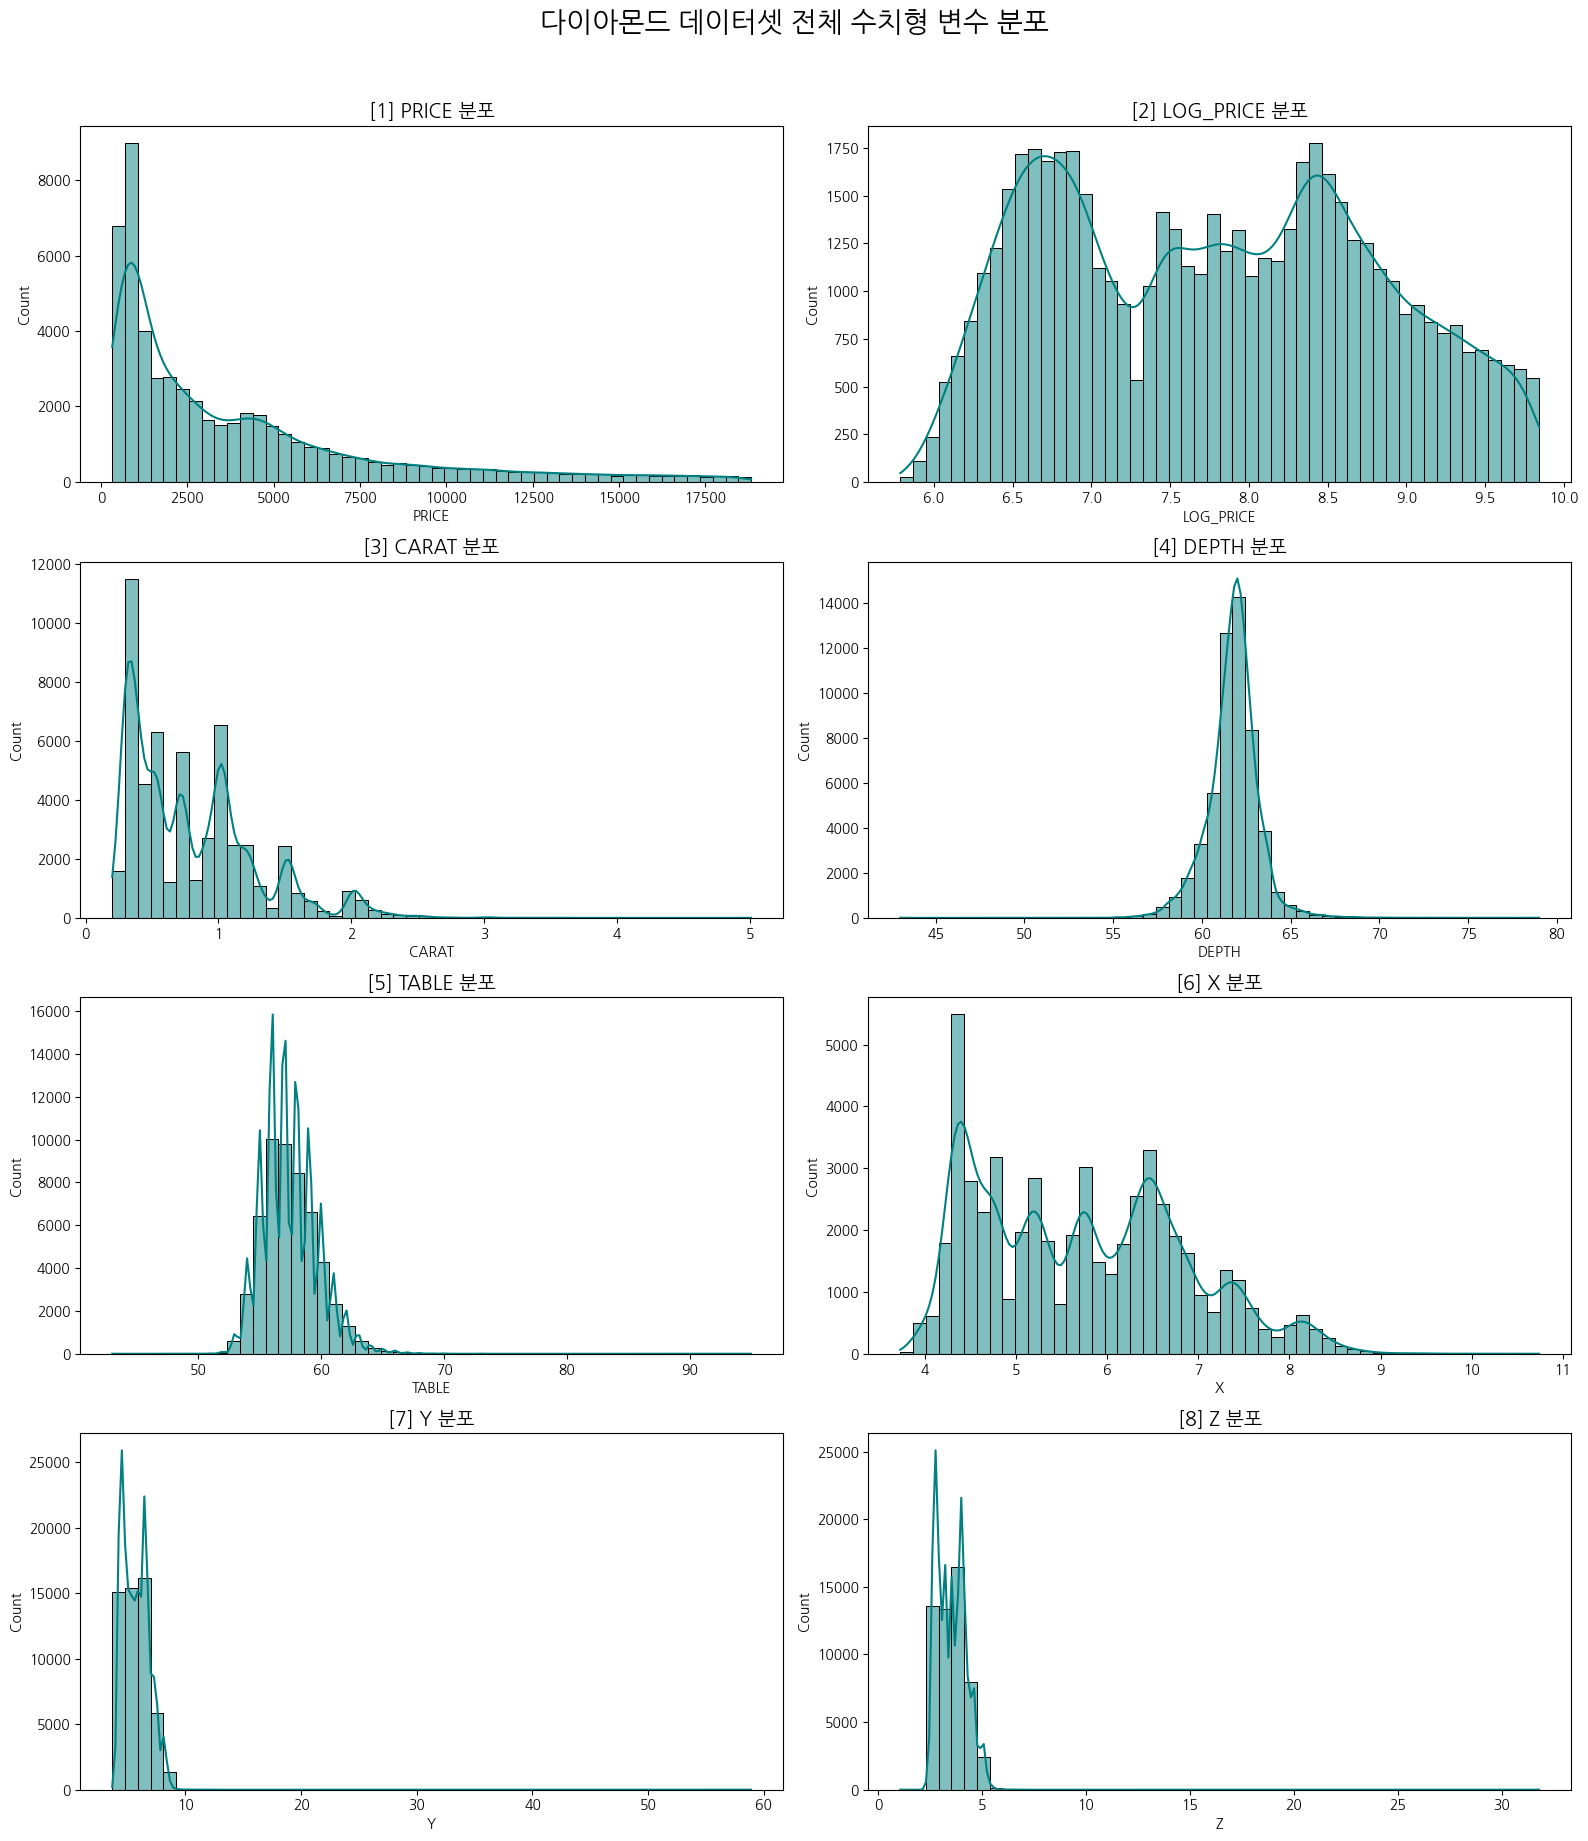

In [ ]:
# 로그 변환된 가격 변수가 생성
if 'log_price' not in df.columns:
    df['log_price'] = np.log(df['price'])


# 1. 주요 수치형 변수 분포 시각화
print("--- 1. 전체 수치형 변수 분포 확인 (Histogram) ---")

# 분석 대상 수치형 컬럼 목록
numeric_cols_for_hist = ['price', 'log_price', 'carat', 'depth', 'table', 'x', 'y', 'z']
n_cols = len(numeric_cols_for_hist)

fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_for_hist):
    sns.histplot(df[col], kde=True, bins=50, ax=axes[i], color='teal')
    axes[i].set_title(f'[{i+1}] {col.upper()} 분포', fontsize=14)
    axes[i].set_xlabel(col.upper())

plt.suptitle("다이아몬드 데이터셋 전체 수치형 변수 분포", y=1.02, fontsize=20)
plt.tight_layout()
plt.show()

1.   다이아몬드의 가격은 대체적으로 5000 이하, 특히 2500 이하에 집중되어있음
2.   캐럿 또한 1 이하에 집중되어있음
3.   Depth는 60 ~ 65 사이에 집중되어있음
4.   Table은 50 ~ 60 사이에 집중되어있음
5.   X는 골고루 분포되어있음
6.   Y는 10 이하에 몰려있음
7.   Z는 5 이하에 몰려있음

--- 1. 수치형 항목 vs. Log(Price) 산점도 ---


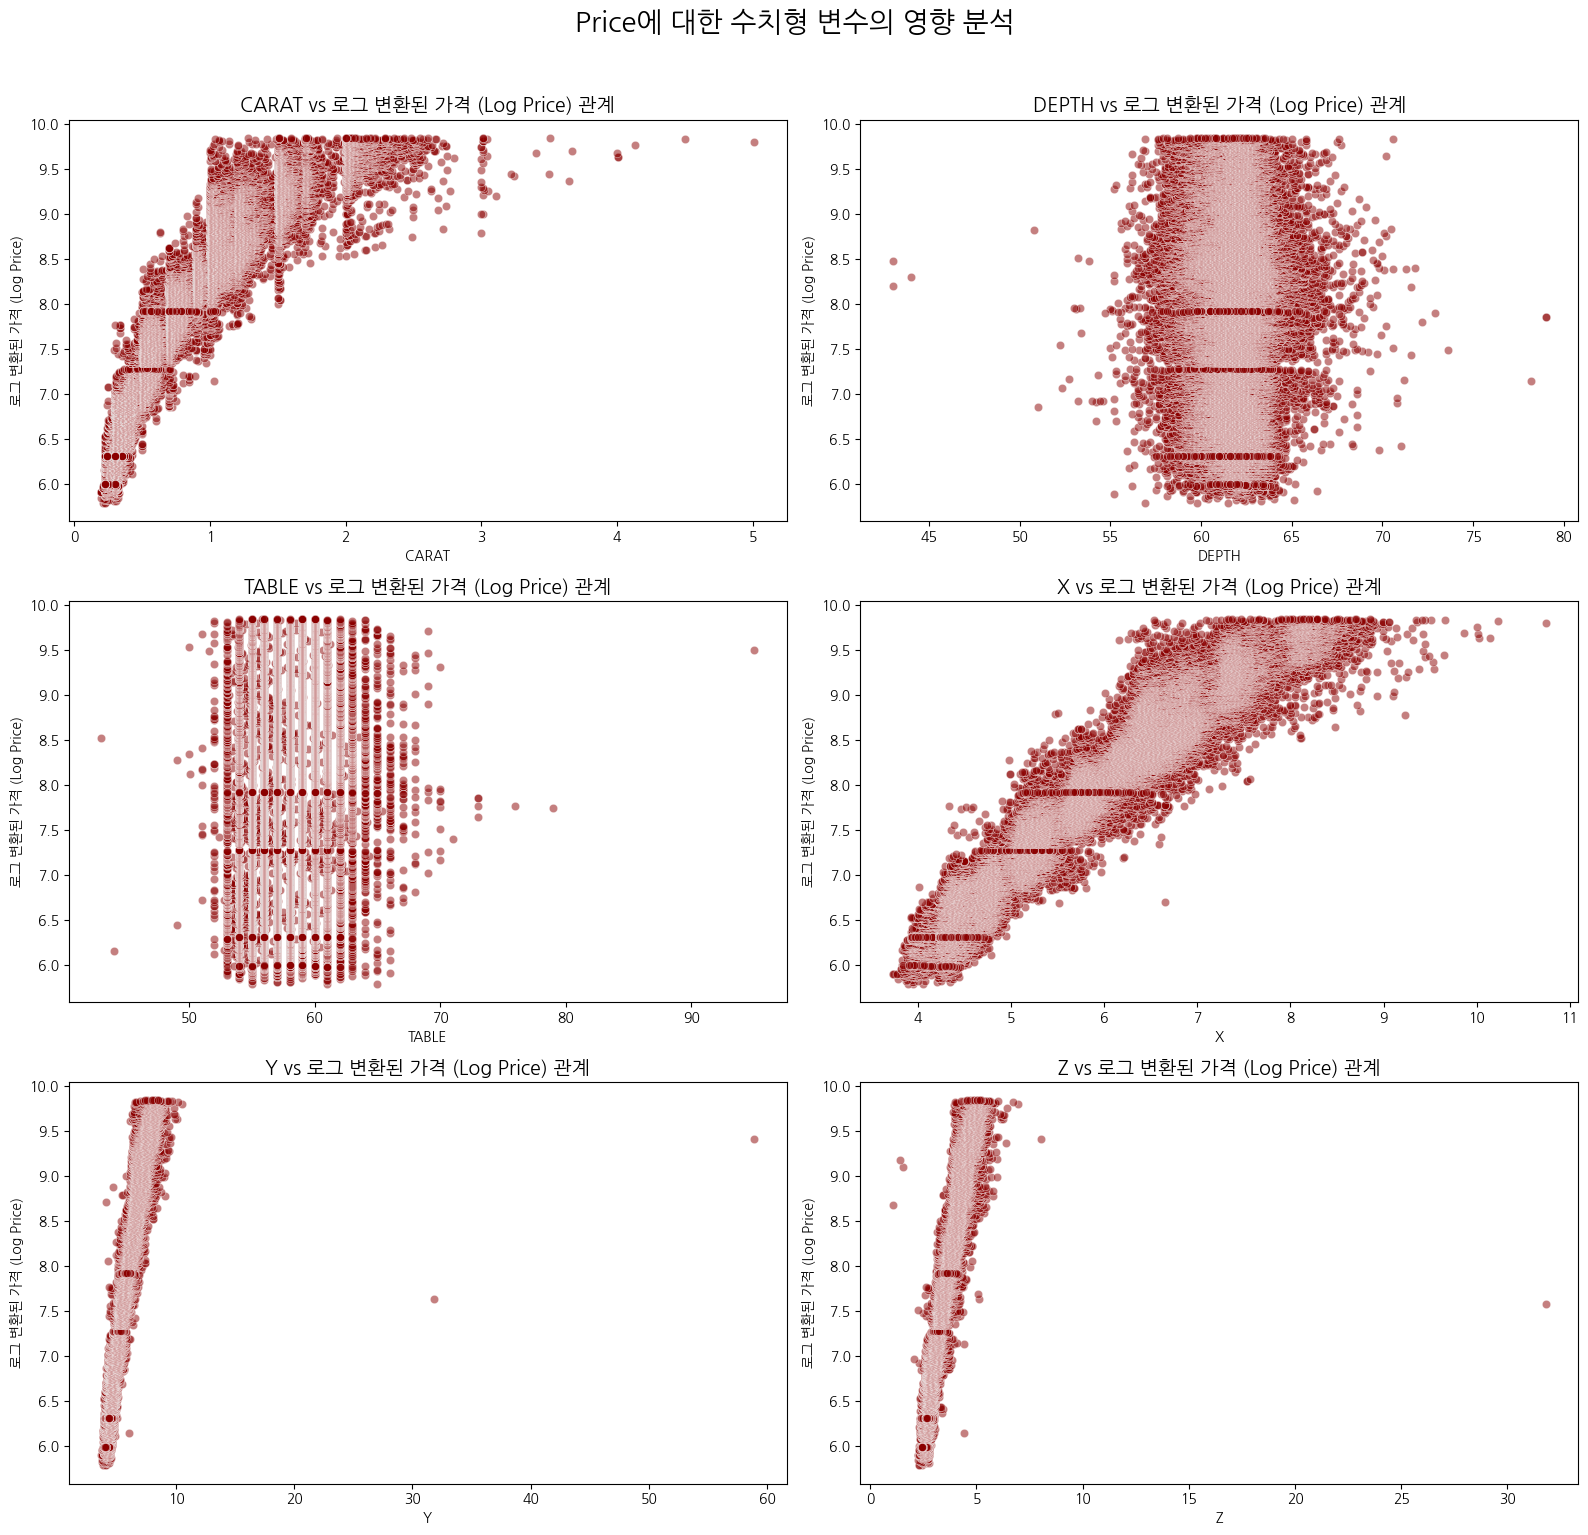


--- 2. 범주형 변수별 가격 분포 (Box Plot) ---


/tmp/ipython-input-3428157235.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=df, order=cut_order, ax=axes[0], palette='viridis')
/tmp/ipython-input-3428157235.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='color', y='price', data=df, order=color_order[::-1], ax=axes[1], palette='magma')
/tmp/ipython-input-3428157235.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clarity', y='price', data=df, order=clarity_order, ax=axes[2], palette='plasma')


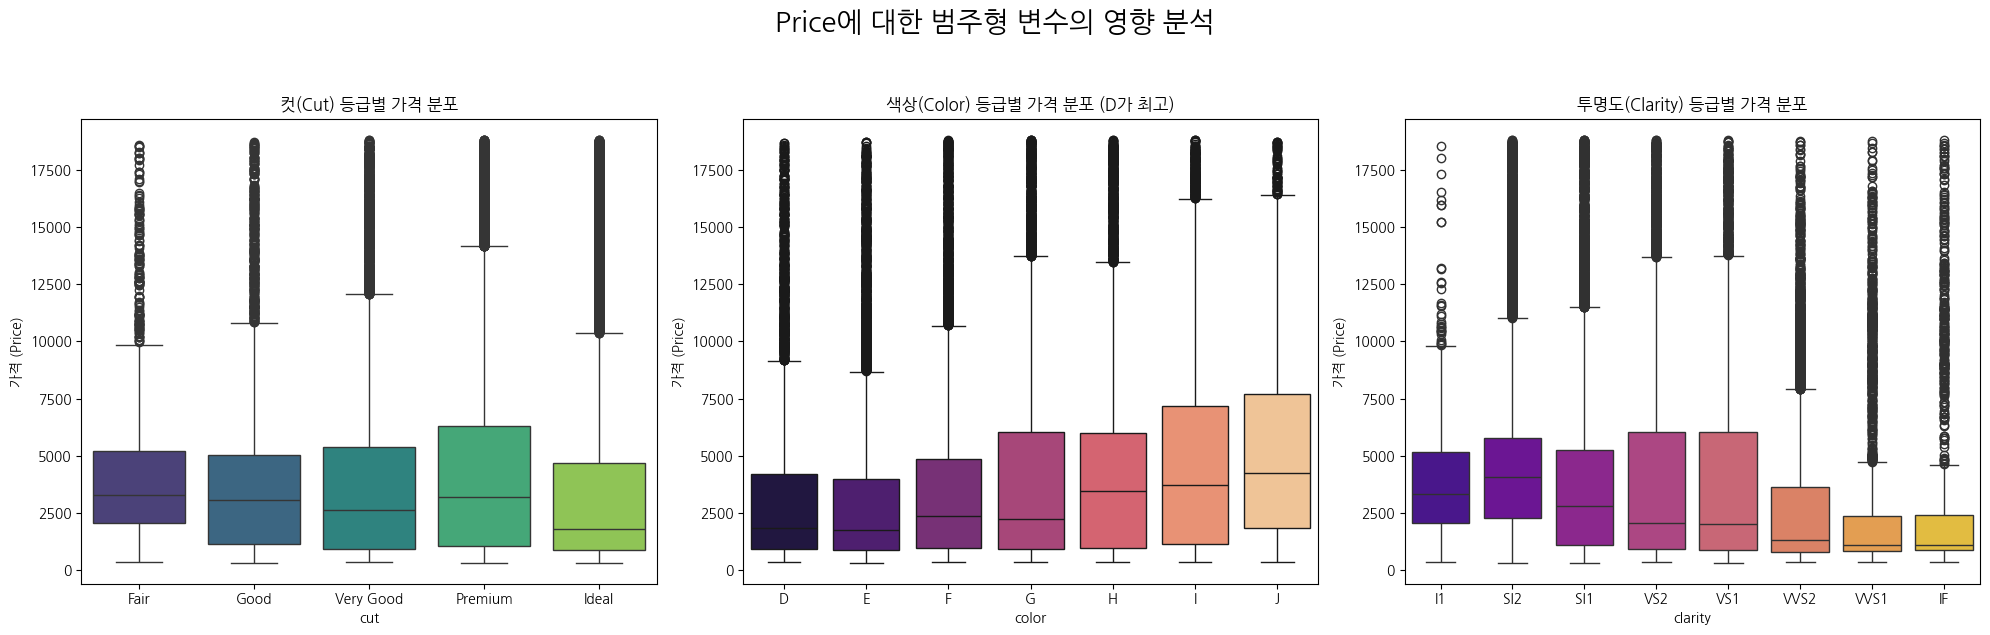

In [ ]:
target_col = 'log_price'
target_label = '로그 변환된 가격 (Log Price)'
target_original_label = '가격 (Price)'


# 1. 수치형 항목 vs. Price (산점도)
numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

print("--- 1. 수치형 항목 vs. Log(Price) 산점도 ---")
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.scatterplot(x=df[col], y=df[target_col], ax=axes[i], alpha=0.5, color='darkred')
    axes[i].set_title(f'{col.upper()} vs {target_label} 관계', fontsize=14)
    axes[i].set_xlabel(col.upper())
    axes[i].set_ylabel(target_label)

plt.suptitle("Price에 대한 수치형 변수의 영향 분석", y=1.02, fontsize=20)
plt.tight_layout()
plt.show()


# 2. 범주형 변수와 가격 관계 시각화
print("\n--- 2. 범주형 변수별 가격 분포 (Box Plot) ---")

cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Cut (컷팅) 등급별 가격 분포
sns.boxplot(x='cut', y='price', data=df, order=cut_order, ax=axes[0], palette='viridis')
axes[0].set_title('컷(Cut) 등급별 가격 분포')
axes[0].set_ylabel('가격 (Price)')

# Color (색상) 등급별 가격 분포
sns.boxplot(x='color', y='price', data=df, order=color_order[::-1], ax=axes[1], palette='magma')
axes[1].set_title('색상(Color) 등급별 가격 분포 (D가 최고)')
axes[1].set_ylabel('가격 (Price)')

# Clarity (투명도) 등급별 가격 분포
sns.boxplot(x='clarity', y='price', data=df, order=clarity_order, ax=axes[2], palette='plasma')
axes[2].set_title('투명도(Clarity) 등급별 가격 분포')
axes[2].set_ylabel('가격 (Price)')

plt.suptitle("Price에 대한 범주형 변수의 영향 분석", y=1.05, fontsize=20)
plt.tight_layout()
plt.show()

1.   Carat과 가격(log_price)은 선형적인 관계가 보임
2.   Depth와 가격(log_price)은 특별한 관계가 보이지 않음
3.   Table과 가격(log_price)은 특별한 관계가 보이지 않음
4.   X와 가격(log_price)은 선형적인 관계가 보임
5.   Y와 가격(log_price)은 선형적인 관계가 보임
6.   Z와 가격(log_price)은 선형적인 관계가 보임
7.   Cut의 경우, Fair ~ Premium 구간에서는 상위 구간으로 갈수록 비싼 가격에 집중되어가는 경향이 보임
9.   Color의 경우, 특정 색상의 다이아가 비싼 경향이 보임
10.   Clarity의 경우, SI ~ VS 구간에 비싼 다이아가 집중된 경향이 보임

(7) 상관관계 분석

--- 수치형 변수 간의 상관 행렬 (값) ---
          carat     depth     table     price         x         y         z
carat  1.000000  0.028259  0.181646  0.921592  0.977779  0.953991  0.961048
depth  0.028259  1.000000 -0.295733 -0.010729 -0.025017 -0.029069  0.095023
table  0.181646 -0.295733  1.000000  0.127245  0.196097  0.184493  0.152483
price  0.921592 -0.010729  0.127245  1.000000  0.887231  0.867864  0.868206
x      0.977779 -0.025017  0.196097  0.887231  1.000000  0.974918  0.975435
y      0.953991 -0.029069  0.184493  0.867864  0.974918  1.000000  0.956744
z      0.961048  0.095023  0.152483  0.868206  0.975435  0.956744  1.000000
--------------------------------------------------


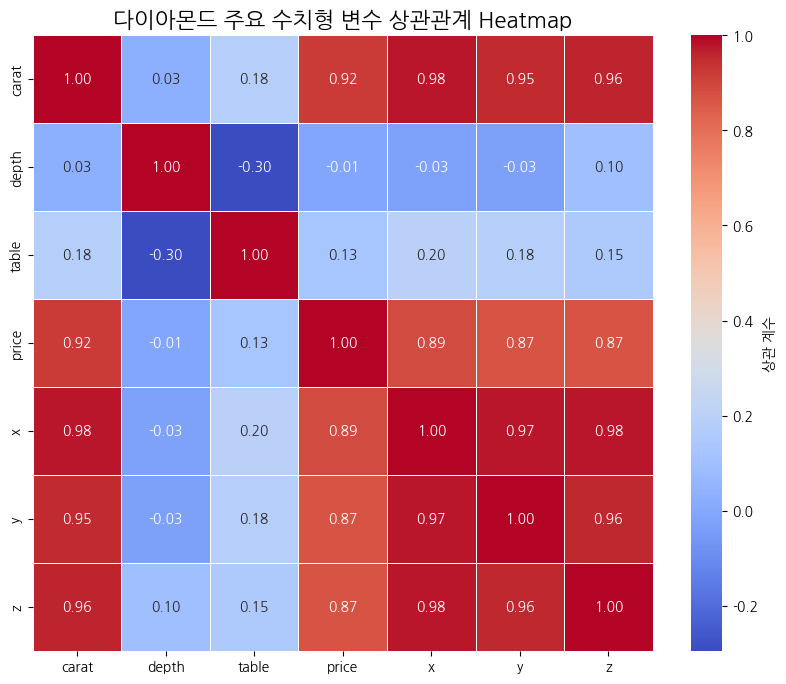

In [ ]:
#  1. 상관 관계 계산 대상 수치형 컬럼 선택
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# 2. 선택된 컬럼들로 데이터프레임을 필터링하고 상관 행렬 계산
correlation_matrix = df[numeric_cols].corr()

print("--- 수치형 변수 간의 상관 행렬 (값) ---")
print(correlation_matrix)
print("-" * 50)

# 3. Heatmap 시각화
plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': '상관 계수'}
)

plt.title('다이아몬드 주요 수치형 변수 상관관계 Heatmap', fontsize=16)
plt.show()

1.   carat, x, y, z 항목은 다이아몬드 가격과 관계가 깊다
2.   depth, table은 price와 관계가 낮다

## 3. 데이터 전처리
- 보고서 8쪽 [3.전처리 및 특성공학]와 연결됨

(1) price와 관계가 높은 데이터만 모인 df_high_corr 생성

In [ ]:
# 1-1. 수치형 컬럼 정의
numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# 1-2. 상관 행렬 계산
correlation_matrix = df[numeric_cols + ['price']].corr()

# 1-3. 'price'와의 상관 계수 절대값 계산 (자신과의 상관관계는 제외)
price_corr = correlation_matrix['price'].abs().drop('price')

# 1-4. 임계값(Threshold) 설정: 절대값 0.8 이상인 항목만 선택
threshold = 0.8
high_corr_numeric_features = price_corr[price_corr >= threshold].index.tolist()

print(f"Price와의 상관 계수 >= {threshold}인 수치형 항목:")
print(high_corr_numeric_features)


# 2. 최종 피처 리스트 구성
# 범주형 항목은 Price 분포에 영향을 주므로 모두 포함
categorical_features = ['cut', 'color', 'clarity']

# 최종 선택된 피처 리스트
final_features = high_corr_numeric_features + categorical_features + ['price']


# 3. 새로운 데이터프레임 생성 및 저장
# .copy()를 사용하여 원본 df와 독립적인 새로운 df를 생성합니다.
df_high_corr = df[final_features].copy()


# 4. 결과 출력 및 확인
print("-" * 50)
print(f"새로 생성된 'df_high_corr'의 최종 컬럼 목록:")
print(df_high_corr.columns.tolist())
print(f"최종 DataFrame 형태: {df_high_corr.shape}")
print("-" * 50)

Price와의 상관 계수 >= 0.8인 수치형 항목:
['carat', 'x', 'y', 'z']
--------------------------------------------------
새로 생성된 'df_high_corr'의 최종 컬럼 목록:
['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity', 'price']
최종 DataFrame 형태: (53920, 8)
--------------------------------------------------


(2) 테스트, 트레인 데이터 분리

In [ ]:
df_high_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53920 non-null  float64 
 1   x        53920 non-null  float64 
 2   y        53920 non-null  float64 
 3   z        53920 non-null  float64 
 4   cut      53920 non-null  category
 5   color    53920 non-null  category
 6   clarity  53920 non-null  category
 7   price    53920 non-null  int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 2.6 MB


<특성공학 1> pd.get_dummies()으로 원-핫 인코딩을 활용하여 범주형 데이터들을 수치형 데이터로 수정한다.

In [ ]:
from sklearn.model_selection import train_test_split

y = df_high_corr['price']
X = df_high_corr.drop(columns=['price'])

# 하나의 범주로 묶어줌
# Cut : 4열(5-1), Color : 6열(7-1), Clarity : 7열(8-1)
X = pd.get_dummies(X, columns=['cut', 'color', 'clarity'], drop_first=True, dtype=int)

train_input, test_input, train_target, test_target = train_test_split(X, y, random_state=42)

# 항목은 총 21개가 출력되어야 정상 (4개(carrot, x, y, z) + 4개 + 6개 + 7개)
print("-" * 50)
print(f"데이터 분리 완료 (random_state=42)")
print(f"훈련용 입력 데이터 (train_input) 크기: {train_input.shape}")
print(f"테스트용 입력 데이터 (test_input) 크기: {test_input.shape}")
print(f"훈련용 타겟 데이터 (train_target) 크기: {train_target.shape}")
print(f"테스트용 타겟 데이터 (test_target) 크기: {test_target.shape}")
print("-" * 50)

--------------------------------------------------
데이터 분리 완료 (random_state=42)
훈련용 입력 데이터 (train_input) 크기: (40440, 21)
테스트용 입력 데이터 (test_input) 크기: (13480, 21)
훈련용 타겟 데이터 (train_target) 크기: (40440,)
테스트용 타겟 데이터 (test_target) 크기: (13480,)
--------------------------------------------------


## 4. 다항회귀 모델 구축 및 평가
- 보고서 9쪽 [4.기본 모델(Base Model) 구축]과 연결됨

(1-1) 1차항 선형 회귀 모델 구축 및 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression 모델 초기화
lr = LinearRegression()

# 모델 훈련
lr.fit(train_input, train_target)

print(f"모델 계수 (Coefficients): {lr.coef_}")
print(f"모델 절편 (Intercept): {lr.intercept_}")

모델 계수 (Coefficients): [11398.57472445  -586.8890108     85.74671828  -972.22197037
   594.21800275   787.85457291   789.20148347   942.67358481
   906.853032    1410.51864907  1889.60758525  2113.51601808
  2167.26965596  2396.96933536  2807.83003979  3757.78639869
  4372.47765084  4676.89845377  5037.33799608  5092.60375893
  5456.82247478]
모델 절편 (Intercept): -5519.520498124092


(1-2) 1차항 선형 회귀 모델 평가

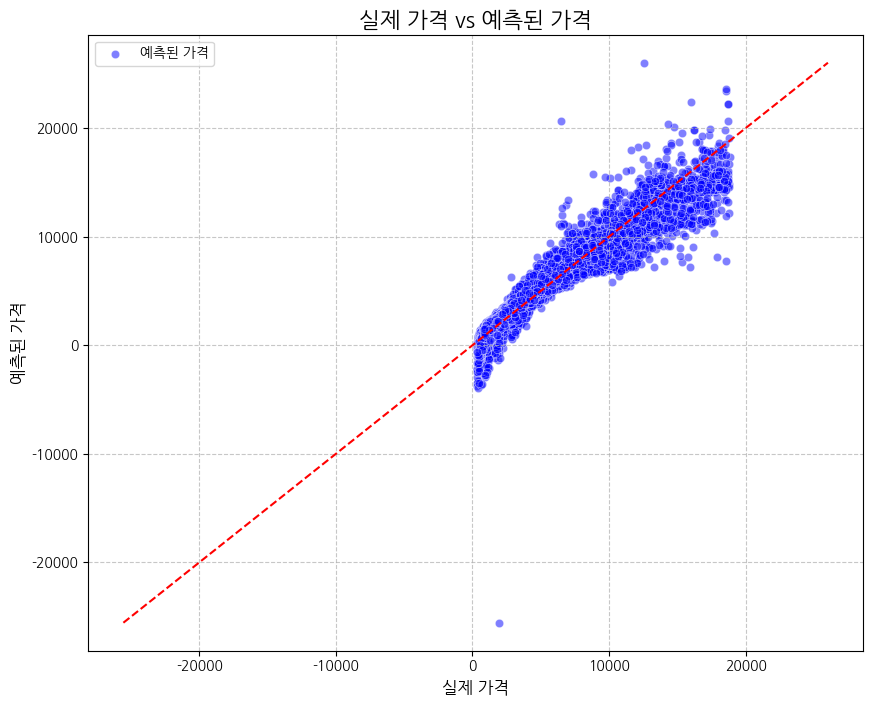

R-squared : 0.9223322179317895
mse : 1222045.4324555725
rmse : 1105.4616377132102
mae : 723.4942272252464


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

# 테스트 세트로 예측
test_prediction = lr.predict(test_input)

#테스트 세트에 대한 예측 그래프 그리기
plt.figure(figsize=(10, 8))

sns.scatterplot(x = test_target, y = test_prediction, alpha=0.5, color='blue', label='예측된 가격')

min_val = min(test_target.min(), test_prediction.min())
max_val = max(test_target.max(), test_prediction.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title('실제 가격 vs 예측된 가격', fontsize=16)
plt.xlabel('실제 가격', fontsize=12)
plt.ylabel('예측된 가격', fontsize=12)

plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# R-squared 계산
r2_score_poly_1 = r2_score(test_target, test_prediction)

# MAE 계산
mae_poly_1 = mean_absolute_error(test_target, test_prediction)

# MSE 계산
mse_poly_1 = mean_squared_error(test_target, test_prediction)

# RMSE 계산
rmse_poly_1 = np.sqrt(mse_poly_1)

print(f"R-squared : {r2_score_poly_1}")
print(f"mse : {mse_poly_1}")
print(f"rmse : {rmse_poly_1}")
print(f"mae : {mae_poly_1}")

(2-1) 2차항 선형 회귀 모델 구축 및 훈련 (특성공학)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# degree=2으로 설정하여 모든 특성에 대해 2차항까지의 조합을 생성
poly = PolynomialFeatures(degree=2, include_bias=False)

train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

print(f"변환 전 훈련 데이터 크기: {train_input.shape}")
print(f"변환 후 훈련 데이터 크기 (2차 다항): {train_poly.shape}")
print("변환 후 만들어진 특성: ", poly.get_feature_names_out())

변환 전 훈련 데이터 크기: (40440, 21)
변환 후 훈련 데이터 크기 (2차 다항): (40440, 252)
변환 후 만들어진 특성:  ['carat' 'x' 'y' 'z' 'cut_Good' 'cut_Very Good' 'cut_Premium' 'cut_Ideal'
 'color_I' 'color_H' 'color_G' 'color_F' 'color_E' 'color_D' 'clarity_SI2'
 'clarity_SI1' 'clarity_VS2' 'clarity_VS1' 'clarity_VVS2' 'clarity_VVS1'
 'clarity_IF' 'carat^2' 'carat x' 'carat y' 'carat z' 'carat cut_Good'
 'carat cut_Very Good' 'carat cut_Premium' 'carat cut_Ideal'
 'carat color_I' 'carat color_H' 'carat color_G' 'carat color_F'
 'carat color_E' 'carat color_D' 'carat clarity_SI2' 'carat clarity_SI1'
 'carat clarity_VS2' 'carat clarity_VS1' 'carat clarity_VVS2'
 'carat clarity_VVS1' 'carat clarity_IF' 'x^2' 'x y' 'x z' 'x cut_Good'
 'x cut_Very Good' 'x cut_Premium' 'x cut_Ideal' 'x color_I' 'x color_H'
 'x color_G' 'x color_F' 'x color_E' 'x color_D' 'x clarity_SI2'
 'x clarity_SI1' 'x clarity_VS2' 'x clarity_VS1' 'x clarity_VVS2'
 'x clarity_VVS1' 'x clarity_IF' 'y^2' 'y z' 'y cut_Good'
 'y cut_Very Good' 'y cut_Premiu

In [ ]:
# Linear Regression 모델 초기화
lr = LinearRegression()

# 모델 훈련
lr.fit(train_poly, train_target)

print(f"모델 계수 (Coefficients): {lr.coef_}")
print(f"모델 절편 (Intercept): {lr.intercept_}")

모델 계수 (Coefficients): [-1.20558368e+04  6.08213080e+03 -1.03910670e+04  1.26565764e+03
 -1.76983643e+03 -1.64224013e+03 -1.96447627e+03 -1.82487619e+03
 -1.53599044e+03 -2.50548588e+03 -3.44213750e+03 -3.91890556e+03
 -4.48290902e+03 -5.29044796e+03  1.82640409e+02 -3.28159499e+02
 -1.35865901e+03 -1.80658273e+03 -2.69176606e+03 -2.78785576e+03
 -4.61389799e+03 -2.12138397e+03 -2.65716464e+03  3.49694758e+03
  2.63830783e+03 -1.11405103e+03 -4.40260874e+02 -6.13093079e+02
 -3.45082549e+02  1.08246921e+03  1.47656934e+03  2.38316474e+03
  3.32195486e+03  2.85302160e+03  2.22058617e+03  5.74133554e+03
  7.99338478e+03  8.84272165e+03  9.27804864e+03  1.01232886e+04
  1.04904241e+04  9.73293424e+03 -6.94560268e+01  6.48249828e+02
 -1.48471626e+03 -2.02963784e+03 -1.32478923e+03 -1.00260249e+03
 -1.99077277e+03 -1.12350268e+03 -9.30785575e+02 -1.57484678e+03
 -1.62411039e+03 -1.48659998e+03 -1.05397388e+03 -2.90529095e+02
  7.01319759e+02  5.38127091e+02  1.06867103e+03  8.21414610e+02
  8

(2-2) 2차항 선형 회귀 모델 평가 (특성공학)

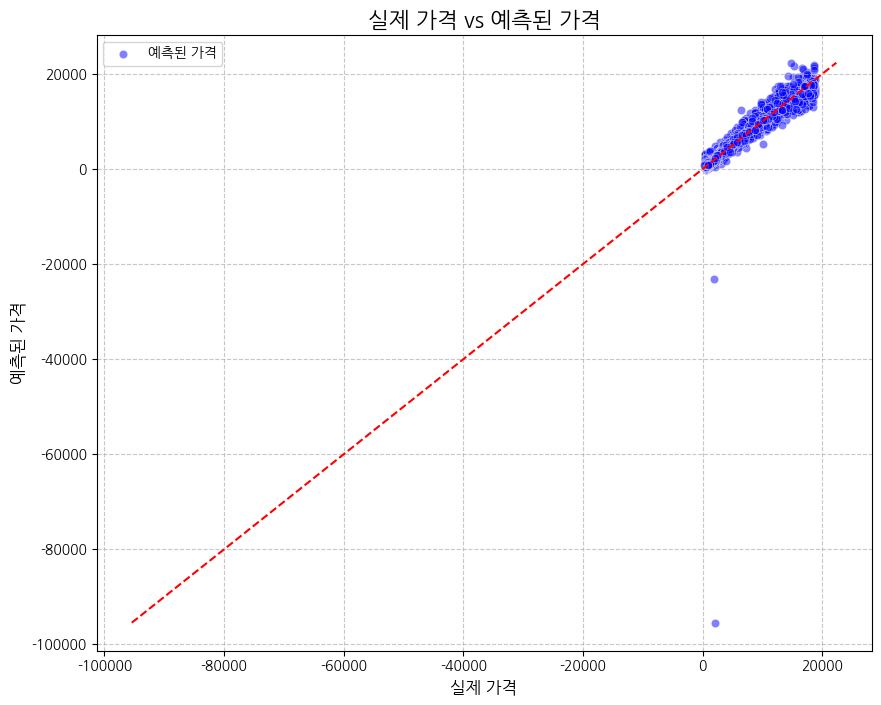

R-squared : 0.9249508846396401
mse : 1180842.6376256421
rmse : 1086.665835308004
mae : 403.17096496977706


In [ ]:
# 테스트 세트로 예측
test_prediction = lr.predict(test_poly)

#테스트 세트에 대한 예측 그래프 그리기
plt.figure(figsize=(10, 8))

sns.scatterplot(x = test_target, y = test_prediction, alpha=0.5, color='blue', label='예측된 가격')

min_val = min(test_target.min(), test_prediction.min())
max_val = max(test_target.max(), test_prediction.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title('실제 가격 vs 예측된 가격', fontsize=16)
plt.xlabel('실제 가격', fontsize=12)
plt.ylabel('예측된 가격', fontsize=12)

plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# R-squared 계산
r2_score_poly_2 = r2_score(test_target, test_prediction)

# MAE 계산
mae_poly_2 = mean_absolute_error(test_target, test_prediction)

# MSE 계산
mse_poly_2 = mean_squared_error(test_target, test_prediction)

# RMSE 계산
rmse_poly_2 = np.sqrt(mse_poly_2)

print(f"R-squared : {r2_score_poly_2}")
print(f"mse : {mse_poly_2}")
print(f"rmse : {rmse_poly_2}")
print(f"mae : {mae_poly_2}")

R2를 제외한 나머지 항목에 대해서는 2차 회귀가 1차 회귀보다 성능이 높다

(3-1) 3차항 선형 회귀 모델 구축 및 훈련 (특성공학)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# degree=3으로 설정하여 모든 특성에 대해 3차항까지의 조합을 생성
poly = PolynomialFeatures(degree=3, include_bias=False)

train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

print(f"변환 전 훈련 데이터 크기: {train_input.shape}")
print(f"변환 후 훈련 데이터 크기 (3차 다항): {train_poly.shape}")
print("변환 후 만들어진 특성: ", poly.get_feature_names_out())

변환 전 훈련 데이터 크기: (40440, 21)
변환 후 훈련 데이터 크기 (3차 다항): (40440, 2023)
변환 후 만들어진 특성:  ['carat' 'x' 'y' ... 'clarity_VVS1^2 clarity_IF'
 'clarity_VVS1 clarity_IF^2' 'clarity_IF^3']


In [ ]:
# Linear Regression 모델 초기화
lr = LinearRegression()

# 모델 훈련
lr.fit(train_poly, train_target)

print(f"모델 계수 (Coefficients): {lr.coef_}")
print(f"모델 절편 (Intercept): {lr.intercept_}")

모델 계수 (Coefficients): [ 334491.27998808   48613.25635921 -145116.56993379 ...       0.
       0.          -42034.30420138]
모델 절편 (Intercept): 231124.64376905072


(3-2) 3차항 선형 회귀 모델 평가 (특성공학)

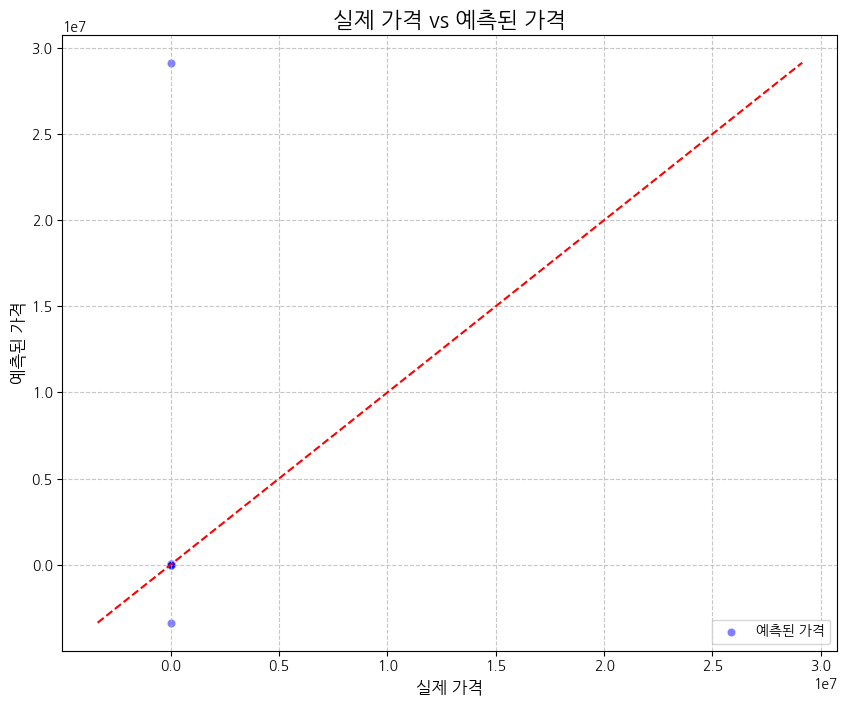

R-squared : -4055.0605847310694
mse : 63819130395.41352
rmse : 252624.48494833894
mae : 2734.7468843571896


In [ ]:
# 테스트 세트로 예측
test_prediction = lr.predict(test_poly)

#테스트 세트에 대한 예측 그래프 그리기
plt.figure(figsize=(10, 8))

sns.scatterplot(x = test_target, y = test_prediction, alpha=0.5, color='blue', label='예측된 가격')

min_val = min(test_target.min(), test_prediction.min())
max_val = max(test_target.max(), test_prediction.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title('실제 가격 vs 예측된 가격', fontsize=16)
plt.xlabel('실제 가격', fontsize=12)
plt.ylabel('예측된 가격', fontsize=12)

plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# R-squared 계산
r2_score_poly_3 = r2_score(test_target, test_prediction)

# MAE 계산
mae_poly_3 = mean_absolute_error(test_target, test_prediction)

# MSE 계산
mse_poly_3 = mean_squared_error(test_target, test_prediction)

# RMSE 계산
rmse_poly_3 = np.sqrt(mse_poly_3)

print(f"R-squared : {r2_score_poly_3}")
print(f"mse : {mse_poly_3}")
print(f"rmse : {rmse_poly_3}")
print(f"mae : {mae_poly_3}")

그래프에서 알 수 있듯이 3차항부터는 의미가 없음

(4) 규제
- 비교적 성능이 좋았던 2차 회귀 환경에서 진행

In [ ]:
# degree=2으로 설정하여 모든 특성에 대해 2차항까지의 조합을 생성
poly = PolynomialFeatures(degree=2, include_bias=False)

train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [ ]:
#사이킷런 StandardScaler 클래스 이용한 표준점수화
from sklearn.preprocessing import StandardScaler

# 객체 생성
ss = StandardScaler()

#훈련데이터에 대한 평균, 표준편차 찾기
ss.fit(train_poly)

# 훈련데이터 표준점수로 변환
train_scaled = ss.transform(train_poly)

# 테스트데이터 표준점수로 변환
test_scaled = ss.transform(test_poly)

In [ ]:
#변환된 데이터 확인, index 0인 훈련 데이터 출력
print(train_scaled[0])

[ 0.21501467  0.36397054  0.40666557  0.46263619 -0.31526344 -0.53698177
 -0.58858234  1.22733559 -0.33712128 -0.42783665  1.94775284 -0.46111828
 -0.47309912 -0.37689557 -0.45075218 -0.56444249  1.84208158 -0.42329734
 -0.32251063 -0.27169537 -0.18512455 -0.04903086  0.10638637  0.11903393
  0.13097853 -0.27555768 -0.44985506 -0.48888314  1.40905292 -0.28946158
 -0.36321998  1.97724029 -0.39622831 -0.401687   -0.32507018 -0.39851534
 -0.4832496   1.87855938 -0.35747646 -0.27267496 -0.23143257 -0.15631762
  0.26732082  0.29150851  0.31971767 -0.30988932 -0.52453724 -0.57354039
  1.41757317 -0.32975525 -0.41809105  2.09828538 -0.45239985 -0.46415965
 -0.37057313 -0.44352666 -0.55318377  1.99484721 -0.41451086 -0.31644869
 -0.26762745 -0.18225619  0.19593409  0.33567437 -0.30997537 -0.52461886
 -0.57093022  1.43525913 -0.32987605 -0.41535346  2.12344777 -0.45254508
 -0.46426649 -0.37063225 -0.44111797 -0.5532983   2.01940798 -0.41461711
 -0.31650872 -0.26764844 -0.18227564  0.36915538 -0

(5) L2 규제
- 릿지(Ridge) 이용한 선형회귀 모델 만들기

In [ ]:
#릿지(Ridge) 이용한 모델 만들기
from sklearn.linear_model import Ridge

# 모델 생성
ridge = Ridge()

# 모델 훈련
ridge.fit(train_scaled, train_target)

# 훈련데이터로 모델 평가
print(ridge.score(train_scaled, train_target))

0.9713220600765139


In [ ]:
#테스트 데이터로 모델 평가
print(ridge.score(test_scaled, test_target))

0.9551695640390221


In [ ]:
# 테스트 세트 예측값 생성
test_prediction_ridge = ridge.predict(test_scaled)

# R-squared 계산
r2_score_poly_2_L2 = r2_score(test_target, test_prediction_ridge)

# MAE 계산
mae_poly_2_L2 = mean_absolute_error(test_target, test_prediction_ridge)

# MSE 계산
mse_poly_2_L2 = mean_squared_error(test_target, test_prediction_ridge)

# RMSE 계산
rmse_poly_2_L2 = np.sqrt(mse_poly_2_L2)

print(f"R-squared : {r2_score_poly_2_L2}")
print(f"mse : {mse_poly_2_L2}")
print(f"rmse : {rmse_poly_2_L2}")
print(f"mae : {mae_poly_2_L2}")

R-squared : 0.9551695640390221
mse : 705373.9406771169
rmse : 839.865430100035
mae : 402.071918159509


(6) L1 규제
- 라쏘 선형 회귀 모델 만들기

In [ ]:
# Lasso 모델 만들기
from sklearn.linear_model import Lasso

#모델 생성
lasso = Lasso(alpha=0.001)

#모델 훈련
lasso.fit(train_scaled, train_target)

#훈련데이터로 모델 평가
print(lasso.score(train_scaled, train_target))

0.9680044190016679


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+10, tolerance: 6.451e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#테스데이터로 모델 평가
print(lasso.score(test_scaled, test_target))

0.7418380819620505


In [ ]:
# 테스트 세트 예측값 생성
test_prediction_lasso = lasso.predict(test_scaled)

# R-squared 계산
r2_score_poly_2_L1 = r2_score(test_target, test_prediction_lasso)

# MAE 계산
mae_poly_2_L1 = mean_absolute_error(test_target, test_prediction_lasso)

# MSE 계산
mse_poly_2_L1 = mean_squared_error(test_target, test_prediction_lasso)

# RMSE 계산
rmse_poly_2_L1 = np.sqrt(mse_poly_2_L1)

print(f"R-squared : {r2_score_poly_2_L1}")
print(f"mse : {mse_poly_2_L1}")
print(f"rmse : {rmse_poly_2_L1}")
print(f"mae : {mae_poly_2_L1}")

R-squared : 0.7418380819620505
mse : 4061987.923064111
rmse : 2015.4374024176764
mae : 440.4522880754968


(7) 다항 회귀 모델 성능 비교

In [ ]:
data = {
    'R-squared': [r2_score_poly_1, r2_score_poly_2, r2_score_poly_3, r2_score_poly_2_L1, r2_score_poly_2_L1],
    'MSE': [mse_poly_1, mse_poly_2, mse_poly_3, mse_poly_2_L1, mse_poly_2_L1],
    'RMSE': [rmse_poly_1, rmse_poly_2, rmse_poly_3, rmse_poly_2_L1, rmse_poly_2_L1],
    'MAE': [mae_poly_1, mae_poly_2, mae_poly_3, mae_poly_2_L1, mae_poly_2_L1]
}

df_poly_comp = pd.DataFrame(data, index=['다중회귀(1차항)', '다중회귀(2차항)', '다중회귀(3차항)', 'Ridge', 'Lasso'])

print(df_poly_comp)

             R-squared           MSE           RMSE          MAE
다중회귀(1차항)     0.922332  1.222045e+06    1105.461638   723.494227
다중회귀(2차항)     0.924951  1.180843e+06    1086.665835   403.170965
다중회귀(3차항) -4055.060585  6.381913e+10  252624.484948  2734.746884
Ridge         0.741838  4.061988e+06    2015.437402   440.452288
Lasso         0.741838  4.061988e+06    2015.437402   440.452288


(8) 결과 분석
*   다중 회귀의 경우, 2차항으로 특성 공학을 활용하였을 때 성능이 가장 우수했음
*   3차항 이상부터는 말도 안 되는 방향으로 모델이 변질했음
*   규제의 경우, 예상 외로 다른 회귀에 비해 성능이 안 좋았음
*   이는 규제가 과도하게 적용되어 모델이 과소적합 상태가 된 것으로 추정됨

(9) Loss function의 활용
- MAE는 모든 오차의 절대값의 평균을 구하는 지표다. 모든 오차를 동일하게 중요하게 다루므로, 큰 오차와 작은 오차에 대한 페널티 차이가 크지 않을 때 적합하며, 가격 예측에서 큰 폭의 예측 실패를 강하게 처벌하고 싶지 않을 때나, 오차의 크기에 관계없이 평균적인 오차만 보고 싶을 때 사용한다.
- MSE는 오차를 제곱하여 평균을 낸 지표다. RMSE는 MSE에 제곱근을 씌워 원래의 단위로 되돌린 지표이며, 다이아몬드 가격 예측에서 고가 제품의 가격을 크게 잘못 예측하는 것이 비즈니스적으로 큰 손실을 초래할 때 RMSE를 사용한다. RMSE는 오차의 단위가 가격으로 나와 직관적 해석이 용이하다.

##5. 성능 향상을 위한 방안 (하이퍼파라미터 조절)
- 경사 하강법 활용 (하이퍼파라미터 alpha 조절)
- grid_search 활용을 통한 규제 재설정 (하이퍼파라미터 alpha 조절)

- 보고서 13쪽 [5.성능 개선(튜닝 및 교차 검증)]과 연결됨

(1-1) 경사하강법을 활용한 1차 회귀 ( alpha=0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled_1 = ss.transform(train_input)
test_scaled_1 = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(loss='squared_error',
                       penalty='l2',
                       alpha=0.1,
                       max_iter=1000,
                       random_state=42)

# 모델 훈련
sgd_reg.fit(train_scaled_1, train_target)

# 모델 성능 확인
test_prediction_sgd_1_01 = sgd_reg.predict(test_scaled_1)

# R-squared 계산
r2_score_sgd_1_01 = r2_score(test_target, test_prediction_sgd_1_01)

# MAE 계산
mae_score_sgd_1_01 = mean_absolute_error(test_target, test_prediction_sgd_1_01)

# MSE 계산
mse_score_sgd_1_01 = mean_squared_error(test_target, test_prediction_sgd_1_01)

# RMSE 계산
rmse_score_sgd_1_01 = np.sqrt(mse_score_sgd_1_01)

print("-" * 50)
print(" SGDRegressor (1차항) 모델 훈련 완료")
print(f"모델 계수 (Coefficients): {sgd_reg.coef_}")
print(f"R-squared : {r2_score_sgd_1_01}")
print(f"mse : {mse_score_sgd_1_01}")
print(f"rmse : {rmse_score_sgd_1_01}")
print(f"mae : {mae_score_sgd_1_01}")
print("-" * 50)

--------------------------------------------------
 SGDRegressor (1차항) 모델 훈련 완료
모델 계수 (Coefficients): [2060.01495227  817.46897673  284.69122884  696.87448109    4.97183572
  145.82982291  167.39687046  245.99755707    8.3043358    65.24605005
  219.88150495  286.98264923  296.9628443   302.14227863 -206.48360528
   37.52442683  324.70205862  327.31563326  369.21831893  333.32208299
  272.20638502]
R-squared : 0.8758811372198343
mse : 1952919.026435852
rmse : 1397.4687926518618
mae : 955.460478482868
--------------------------------------------------


(1-2) 경사하강법을 활용한 1차 회귀 ( alpha=0.01)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(loss='squared_error',
                       penalty='l2',
                       alpha=0.01,
                       max_iter=1000,
                       random_state=42)

# 모델 훈련
sgd_reg.fit(train_scaled_1, train_target)

# 모델 성능 확인
test_prediction_sgd_1_001 = sgd_reg.predict(test_scaled_1)

# R-squared 계산
r2_score_sgd_1_001 = r2_score(test_target, test_prediction_sgd_1_001)

# MAE 계산
mae_score_sgd_1_001 = mean_absolute_error(test_target, test_prediction_sgd_1_001)

# MSE 계산
mse_score_sgd_1_001 = mean_squared_error(test_target, test_prediction_sgd_1_001)

# RMSE 계산
rmse_score_sgd_1_001 = np.sqrt(mse_score_sgd_1_001)

print("-" * 50)
print(" SGDRegressor (1차항) 모델 훈련 완료")
print(f"모델 계수 (Coefficients): {sgd_reg.coef_}")
print(f"R-squared : {r2_score_sgd_1_001}")
print(f"mse : {mse_score_sgd_1_001}")
print(f"rmse : {rmse_score_sgd_1_001}")
print(f"mae : {mae_score_sgd_1_001}")
print("-" * 50)

--------------------------------------------------
 SGDRegressor (1차항) 모델 훈련 완료
모델 계수 (Coefficients): [4250.70415374    5.26086252   76.62836563 -169.56553462  175.88707191
  320.33933226  375.23896072  453.93926482  188.81688022  391.08323984
  637.45584271  648.23866222  700.93123338  648.84280689  442.27699536
  867.71595019 1134.7444919  1087.42749103 1006.46594114  874.68995365
  687.35128003]
R-squared : 0.9194538408543628
mse : 1267334.5789547607
rmse : 1125.7595564572218
mae : 771.308476547
--------------------------------------------------


(1-3) 경사하강법을 활용한 1차 회귀 ( alpha=0.001)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(loss='squared_error',
                       penalty='l2',
                       alpha=0.001,
                       max_iter=1000,
                       random_state=42)

# 모델 훈련
sgd_reg.fit(train_scaled_1, train_target)

# 모델 성능 확인
test_prediction_sgd_1_0001 = sgd_reg.predict(test_scaled_1)

# R-squared 계산
r2_score_sgd_1_0001 = r2_score(test_target, test_prediction_sgd_1_0001)

# MAE 계산
mae_score_sgd_1_0001 = mean_absolute_error(test_target, test_prediction_sgd_1_0001)

# MSE 계산
mse_score_sgd_1_0001 = mean_squared_error(test_target, test_prediction_sgd_1_0001)

# RMSE 계산
rmse_score_sgd_1_0001 = np.sqrt(mse_score_sgd_1_0001)

print("-" * 50)
print(" SGDRegressor (1차항) 모델 훈련 완료")
print(f"모델 계수 (Coefficients): {sgd_reg.coef_}")
print(f"R-squared : {r2_score_sgd_1_0001}")
print(f"mse : {mse_score_sgd_1_0001}")
print(f"rmse : {rmse_score_sgd_1_0001}")
print(f"mae : {mae_score_sgd_1_0001}")
print("-" * 50)

--------------------------------------------------
 SGDRegressor (1차항) 모델 훈련 완료
모델 계수 (Coefficients): [5258.93932587 -525.84155338   74.95212962 -612.5442718   167.17016232
  348.33021186  340.24901649  463.57489524  273.23720848  495.23122466
  730.998358    787.07472722  833.17337095  768.23130655  951.47182027
 1483.35126641 1729.1155     1585.6142443  1405.50362497 1209.78699387
  926.89465468]
R-squared : 0.9226038651950512
mse : 1217771.2625427966
rmse : 1103.5267384811284
mae : 726.0999957042893
--------------------------------------------------


(1-4) 경사하강법을 활용한 1차 회귀 ( alpha=0.0001)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(loss='squared_error',
                       penalty='l2',
                       alpha=0.001,
                       max_iter=1000,
                       random_state=42)

# 모델 훈련
sgd_reg.fit(train_scaled_1, train_target)

# 모델 성능 확인
test_prediction_sgd_1_00001 = sgd_reg.predict(test_scaled_1)

# R-squared 계산
r2_score_sgd_1_00001 = r2_score(test_target, test_prediction_sgd_1_00001)

# MAE 계산
mae_score_sgd_1_00001 = mean_absolute_error(test_target, test_prediction_sgd_1_00001)

# MSE 계산
mse_score_sgd_1_00001 = mean_squared_error(test_target, test_prediction_sgd_1_00001)

# RMSE 계산
rmse_score_sgd_1_00001 = np.sqrt(mse_score_sgd_1_00001)

print("-" * 50)
print(" SGDRegressor (1차항) 모델 훈련 완료")
print(f"모델 계수 (Coefficients): {sgd_reg.coef_}")
print(f"R-squared : {r2_score_sgd_1_00001}")
print(f"mse : {mse_score_sgd_1_00001}")
print(f"rmse : {rmse_score_sgd_1_00001}")
print(f"mae : {mae_score_sgd_1_00001}")
print("-" * 50)

--------------------------------------------------
 SGDRegressor (1차항) 모델 훈련 완료
모델 계수 (Coefficients): [5258.93932587 -525.84155338   74.95212962 -612.5442718   167.17016232
  348.33021186  340.24901649  463.57489524  273.23720848  495.23122466
  730.998358    787.07472722  833.17337095  768.23130655  951.47182027
 1483.35126641 1729.1155     1585.6142443  1405.50362497 1209.78699387
  926.89465468]
R-squared : 0.9226038651950512
mse : 1217771.2625427966
rmse : 1103.5267384811284
mae : 726.0999957042893
--------------------------------------------------


(1-5) 알파 값의 변화에 따른 경사하강법 결과 분석

In [ ]:
data = {
    'R-squared': [r2_score_sgd_1_01, r2_score_sgd_1_001, r2_score_sgd_1_0001, r2_score_sgd_1_00001],
    'MSE': [mse_score_sgd_1_01, mse_score_sgd_1_001, mse_score_sgd_1_0001, mse_score_sgd_1_00001],
    'RMSE': [rmse_score_sgd_1_01, rmse_score_sgd_1_001, rmse_score_sgd_1_0001, rmse_score_sgd_1_00001],
    'MAE': [mae_score_sgd_1_01, mae_score_sgd_1_001, mae_score_sgd_1_0001, mae_score_sgd_1_00001]
}

df_list_1_alpha = pd.DataFrame(data, index=['alpha=0.1', 'alpha=0.01', 'alpha=0.001', 'alpha=0.0001'])

print(df_list_1_alpha)

              R-squared           MSE         RMSE         MAE
alpha=0.1      0.875881  1.952919e+06  1397.468793  955.460478
alpha=0.01     0.919454  1.267335e+06  1125.759556  771.308477
alpha=0.001    0.922604  1.217771e+06  1103.526738  726.099996
alpha=0.0001   0.922604  1.217771e+06  1103.526738  726.099996


결과 분석 : alpha가 0.001일 때와 0.0001일 때 모두 같은 값을 보인다. 학습률은 0.001일 때가 최적의 환경이다. LinearRegression()을 사용했을 때보다 아주 소폭의 성능이 향상되었다.

(2-1) Ridge규제를 활용한 2차 회귀 ( alpha=0.1)

In [ ]:
# 모델 생성
ridge = Ridge(alpha=0.1)

# 모델 훈련
ridge.fit(train_scaled, train_target)

# 훈련데이터로 모델 평가
print(ridge.score(train_scaled, train_target))

0.971581772966805


In [ ]:
# 테스트 세트 예측값 생성
test_prediction_ridge_01 = ridge.predict(test_scaled)

# R-squared 계산
r2_score_poly_2_L2_01 = r2_score(test_target, test_prediction_ridge_01)

# MAE 계산
mae_poly_2_L2_01 = mean_absolute_error(test_target, test_prediction_ridge_01)

# MSE 계산
mse_poly_2_L2_01 = mean_squared_error(test_target, test_prediction_ridge_01)

# RMSE 계산
rmse_poly_2_L2_01 = np.sqrt(mse_poly_2_L2_01)

print(f"R-squared : {r2_score_poly_2_L2_01}")
print(f"mse : {mse_poly_2_L2_01}")
print(f"rmse : {rmse_poly_2_L2_01}")
print(f"mae : {mae_poly_2_L2_01}")

R-squared : 0.9269378188235815
mse : 1149579.6894711163
rmse : 1072.184540772304
mae : 403.1604894008289


(2-2) Ridge규제를 활용한 2차 회귀 ( alpha=1)

In [ ]:
# 모델 생성
ridge = Ridge(alpha=1)

# 모델 훈련
ridge.fit(train_scaled, train_target)

# 훈련데이터로 모델 평가
print(ridge.score(train_scaled, train_target))

0.9713220600765139


In [ ]:
# 테스트 세트 예측값 생성
test_prediction_ridge_1 = ridge.predict(test_scaled)

# R-squared 계산
r2_score_poly_2_L2_1 = r2_score(test_target, test_prediction_ridge_1)

# MAE 계산
mae_poly_2_L2_1 = mean_absolute_error(test_target, test_prediction_ridge_1)

# MSE 계산
mse_poly_2_L2_1 = mean_squared_error(test_target, test_prediction_ridge_1)

# RMSE 계산
rmse_poly_2_L2_1 = np.sqrt(mse_poly_2_L2_1)

print(f"R-squared : {r2_score_poly_2_L2_1}")
print(f"mse : {mse_poly_2_L2_1}")
print(f"rmse : {rmse_poly_2_L2_1}")
print(f"mae : {mae_poly_2_L2_1}")

R-squared : 0.9551695640390221
mse : 705373.9406771169
rmse : 839.865430100035
mae : 402.071918159509


(2-3) Ridge규제를 활용한 2차 회귀 ( alpha=10)

In [ ]:
# 모델 생성
ridge = Ridge(alpha=10)

# 모델 훈련
ridge.fit(train_scaled, train_target)

# 훈련데이터로 모델 평가
print(ridge.score(train_scaled, train_target))

0.9704401352494447


In [ ]:
# 테스트 세트 예측값 생성
test_prediction_ridge_10 = ridge.predict(test_scaled)

# R-squared 계산
r2_score_poly_2_L2_10 = r2_score(test_target, test_prediction_ridge_10)

# MAE 계산
mae_poly_2_L2_10 = mean_absolute_error(test_target, test_prediction_ridge_10)

# MSE 계산
mse_poly_2_L2_10 = mean_squared_error(test_target, test_prediction_ridge_10)

# RMSE 계산
rmse_poly_2_L2_10 = np.sqrt(mse_poly_2_L2_10)

print(f"R-squared : {r2_score_poly_2_L2_10}")
print(f"mse : {mse_poly_2_L2_10}")
print(f"rmse : {rmse_poly_2_L2_10}")
print(f"mae : {mae_poly_2_L2_10}")

R-squared : 0.9677766731676463
mse : 507010.350049877
rmse : 712.0465926116613
mae : 405.4313618818346


(2-4) Ridge규제를 활용한 2차 회귀 ( alpha=100)

In [ ]:
# 모델 생성
ridge = Ridge(alpha=100)

# 모델 훈련
ridge.fit(train_scaled, train_target)

# 훈련데이터로 모델 평가
print(ridge.score(train_scaled, train_target))

0.967423437934787


In [ ]:
# 테스트 세트 예측값 생성
test_prediction_ridge_100 = ridge.predict(test_scaled)

# R-squared 계산
r2_score_poly_2_L2_100 = r2_score(test_target, test_prediction_ridge_100)

# MAE 계산
mae_poly_2_L2_100 = mean_absolute_error(test_target, test_prediction_ridge_100)

# MSE 계산
mse_poly_2_L2_100 = mean_squared_error(test_target, test_prediction_ridge_100)

# RMSE 계산
rmse_poly_2_L2_100 = np.sqrt(mse_poly_2_L2_100)

print(f"R-squared : {r2_score_poly_2_L2_100}")
print(f"mse : {mse_poly_2_L2_100}")
print(f"rmse : {rmse_poly_2_L2_100}")
print(f"mae : {mae_poly_2_L2_100}")

R-squared : 0.9614525870134557
mse : 606515.1948309063
rmse : 778.7908543575138
mae : 420.7163130646055


(2-5) 알파 값의 변화에 따른 Ridge 규제 결과 분석

In [ ]:
data = {
    'R-squared': [r2_score_poly_2_L2_01, r2_score_poly_2_L2_1, r2_score_poly_2_L2_10, r2_score_poly_2_L2_100],
    'MSE': [mse_poly_2_L2_01, mse_poly_2_L2_1, mse_poly_2_L2_10, mse_poly_2_L2_100],
    'RMSE': [rmse_poly_2_L2_01, rmse_poly_2_L2_1, rmse_poly_2_L2_10, rmse_poly_2_L2_100],
    'MAE': [mae_poly_2_L2_01, mae_poly_2_L2_1, mae_poly_2_L2_10, mae_poly_2_L2_100]
}

df_list_2_L2_alpha = pd.DataFrame(data, index=['alpha=0.01', 'alpha=1', 'alpha=10', 'alpha=100'])

print(df_list_2_L2_alpha)

            R-squared           MSE         RMSE         MAE
alpha=0.01   0.926938  1.149580e+06  1072.184541  403.160489
alpha=1      0.955170  7.053739e+05   839.865430  402.071918
alpha=10     0.967777  5.070104e+05   712.046593  405.431362
alpha=100    0.961453  6.065152e+05   778.790854  420.716313


결과 분석 : alpha가 10일 때가 최적의 조건이다. 이전에 alpha가 0.001일 때보다 아주 대폭 성능이 향상되었다.

(2-6) grid_search 활용을 통한 최적의 alpaha 값 도출
- cross_validate 활용

In [ ]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge(random_state=42)

alpha_range = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alpha_range}

grid_search_ridge = GridSearchCV(estimator=ridge,
                                 param_grid=param_grid,
                                 scoring='r2',
                                 cv=5,
                                 n_jobs=-1)

# 훈련
grid_search_ridge.fit(train_scaled, train_target)

best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_score_ridge = grid_search_ridge.best_score_

best_ridge_model = grid_search_ridge.best_estimator_
test_prediction_ridge_tuned = best_ridge_model.predict(test_scaled)

# 최종 성능 지표 계산
r2_score_ridge_tuned = r2_score(test_target, test_prediction_ridge_tuned)
mse_score_ridge_tuned = mean_squared_error(test_target, test_prediction_ridge_tuned)
rmse_score_ridge_tuned = np.sqrt(mse_score_ridge_tuned)
mae_score_ridge_tuned = mean_absolute_error(test_target, test_prediction_ridge_tuned)

print(f"R-squared : {r2_score_ridge_tuned}")
print(f"mse : {mse_score_ridge_tuned}")
print(f"rmse : {rmse_score_ridge_tuned}")
print(f"mae : {mae_score_ridge_tuned}")

R-squared : 0.9614525870134557
mse : 606515.1948309063
rmse : 778.7908543575138
mae : 420.7163130646055


(3-1) Lasso규제를 활용한 2차 회귀 (alpha=0.1)

In [ ]:
#모델 생성
lasso = Lasso(alpha=0.1)

#모델 훈련
lasso.fit(train_scaled, train_target)

#훈련데이터로 모델 평가
print(lasso.score(train_scaled, train_target))

0.9679619748737261


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.944e+09, tolerance: 6.451e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# 테스트 세트 예측값 생성
test_prediction_lasso_01 = lasso.predict(test_scaled)

# R-squared 계산
r2_score_poly_2_L1_01 = r2_score(test_target, test_prediction_lasso_01)

# MAE 계산
mae_poly_2_L1_01 = mean_absolute_error(test_target, test_prediction_lasso_01)

# MSE 계산
mse_poly_2_L1_01 = mean_squared_error(test_target, test_prediction_lasso_01)

# RMSE 계산
rmse_poly_2_L1_01 = np.sqrt(mse_poly_2_L1_01)

print(f"R-squared : {r2_score_poly_2_L1_01}")
print(f"mse : {mse_poly_2_L1_01}")
print(f"rmse : {rmse_poly_2_L1_01}")
print(f"mae : {mae_poly_2_L1_01}")

R-squared : 0.743547066415601
mse : 4035098.3095076825
rmse : 2008.7554130624471
mae : 439.5385832924292


(3-2) Lasso규제를 활용한 2차 회귀 (alpha=1)

In [ ]:
#모델 생성
lasso = Lasso(alpha=1)

#모델 훈련
lasso.fit(train_scaled, train_target)

#훈련데이터로 모델 평가
print(lasso.score(train_scaled, train_target))

0.9671230753030368


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.033e+09, tolerance: 6.451e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# 테스트 세트 예측값 생성
test_prediction_lasso_1 = lasso.predict(test_scaled)

# R-squared 계산
r2_score_poly_2_L1_1 = r2_score(test_target, test_prediction_lasso_1)

# MAE 계산
mae_poly_2_L1_1 = mean_absolute_error(test_target, test_prediction_lasso_1)

# MSE 계산
mse_poly_2_L1_1 = mean_squared_error(test_target, test_prediction_lasso_1)

# RMSE 계산
rmse_poly_2_L1_1 = np.sqrt(mse_poly_2_L1_1)

print(f"R-squared : {r2_score_poly_2_L1_1}")
print(f"mse : {mse_poly_2_L1_1}")
print(f"rmse : {rmse_poly_2_L1_1}")
print(f"mae : {mae_poly_2_L1_1}")

R-squared : 0.8403995448369856
mse : 2511195.788731322
rmse : 1584.6752944156485
mae : 434.69670238122586


(3-3) Lasso규제를 활용한 2차 회귀 (alpha=10)

In [ ]:
#모델 생성
lasso = Lasso(alpha=10)

#모델 훈련
lasso.fit(train_scaled, train_target)

#훈련데이터로 모델 평가
print(lasso.score(train_scaled, train_target))

0.9580511685911668


In [ ]:
# 테스트 세트 예측값 생성
test_prediction_lasso_10 = lasso.predict(test_scaled)

# R-squared 계산
r2_score_poly_2_L1_10 = r2_score(test_target, test_prediction_lasso_10)

# MAE 계산
mae_poly_2_L1_10 = mean_absolute_error(test_target, test_prediction_lasso_10)

# MSE 계산
mse_poly_2_L1_10 = mean_squared_error(test_target, test_prediction_lasso_10)

# RMSE 계산
rmse_poly_2_L1_10 = np.sqrt(mse_poly_2_L1_10)

print(f"R-squared : {r2_score_poly_2_L1_10}")
print(f"mse : {mse_poly_2_L1_10}")
print(f"rmse : {rmse_poly_2_L1_10}")
print(f"mae : {mae_poly_2_L1_10}")

R-squared : 0.9600644833521753
mse : 628355.9851028989
rmse : 792.6890847633131
mae : 485.77878875190504


(3-4) Lasso규제를 활용한 2차 회귀 (alpha=100)

In [ ]:
#모델 생성
lasso = Lasso(alpha=100)

#모델 훈련
lasso.fit(train_scaled, train_target)

#훈련데이터로 모델 평가
print(lasso.score(train_scaled, train_target))

0.9167315678258227


In [ ]:
# 테스트 세트 예측값 생성
test_prediction_lasso_100 = lasso.predict(test_scaled)

# R-squared 계산
r2_score_poly_2_L1_100 = r2_score(test_target, test_prediction_lasso_100)

# MAE 계산
mae_poly_2_L1_100 = mean_absolute_error(test_target, test_prediction_lasso_100)

# MSE 계산
mse_poly_2_L1_100 = mean_squared_error(test_target, test_prediction_lasso_100)

# RMSE 계산
rmse_poly_2_L1_100 = np.sqrt(mse_poly_2_L1_100)

print(f"R-squared : {r2_score_poly_2_L1_100}")
print(f"mse : {mse_poly_2_L1_100}")
print(f"rmse : {rmse_poly_2_L1_100}")
print(f"mae : {mae_poly_2_L1_100}")

R-squared : 0.926172294180454
mse : 1161624.6567491142
rmse : 1077.786925486255
mae : 639.4748808557264


(3-5) 알파 값의 변화에 따른 Lasso 규제 결과 분석

In [ ]:
data = {
    'R-squared': [r2_score_poly_2_L1_01, r2_score_poly_2_L1_1, r2_score_poly_2_L1_10, r2_score_poly_2_L1_100],
    'MSE': [mse_poly_2_L1_01, mse_poly_2_L1_1, mse_poly_2_L1_10, mse_poly_2_L1_100],
    'RMSE': [rmse_poly_2_L1_01, rmse_poly_2_L1_1, rmse_poly_2_L1_10, rmse_poly_2_L1_100],
    'MAE': [mae_poly_2_L1_01, mae_poly_2_L1_1, mae_poly_2_L1_10, mae_poly_2_L1_100]
}

# 인덱스를 새로운 알파 값에 맞게 설정합니다.
df_list_2_L1_alpha = pd.DataFrame(data, index=['alpha=0.01', 'alpha=1', 'alpha=10', 'alpha=100'])

print(df_list_2_L1_alpha)

            R-squared           MSE         RMSE         MAE
alpha=0.01   0.743547  4.035098e+06  2008.755413  439.538583
alpha=1      0.840400  2.511196e+06  1584.675294  434.696702
alpha=10     0.960064  6.283560e+05   792.689085  485.778789
alpha=100    0.926172  1.161625e+06  1077.786925  639.474881


결과 분석 : alpha가 10일 때가 최적의 조건이다. 이전에 alpha가 0.001일 때보다 아주 대폭 성능이 향상되었다.

(4) 결론
- 특성공학으로 특성들을 다항으로 회귀하여 성능을 향살시킬 수 있었다
- 규제와 경사하강법에서 하이퍼파라미터 값을 조절하며 성능을 향상시킬 수 있었다.